# 하나의 은닉계층을 갖는 다층 퍼셉트론으로 표현하기

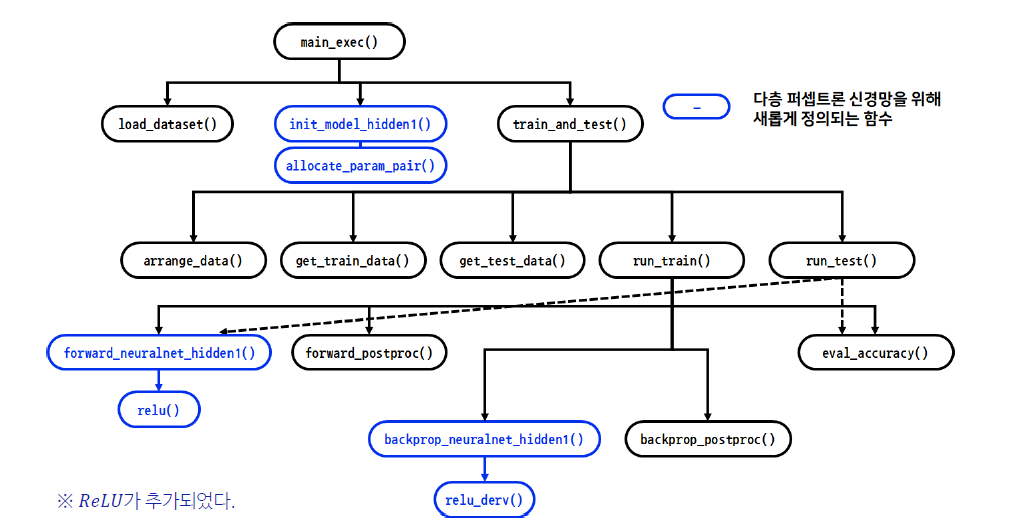

In [8]:
#가중치와 편향값을 구해준다.
#hidden_cnt: 은닉계층에서 파라미터가 몇 개 생성되었는지 보기
#신경망 파라미터 생성함수
def init_model_hidden1():
  global pm_output, pm_hidden, input_cnt, output_cnt, hidden_cnt

  #파라미터를 쌍으로 만들어내는데 입력 계층과 은닉 계층 사이에 있는 편향값을 구하는 함수

  #입력 계층과 히든 계층 사이의 파라미터
  pm_hidden = allocate_param_pair([input_cnt,hidden_cnt])
  #은닉계층과 출력 계층 사이의 파라미터
  pm_output=allocate_param_pair([hidden_cnt,output_cnt])

  #몇개씩 있는지를 받고 weight 생성 -> allocate_param_pair에서



In [9]:
import numpy as np
#bias값에 끝자락의 값을 받는다.
#파라미터 생성부분
def allocation_param_pair(shape):
  #가중치와 편향 -> 각 layer들이 갖고 있는 파라미터 수에 따른 것을 만들어 내는 함수
  weight = np.random.normal(RND_MEAN, RND_STD, shape)
  bias = np.zeors(shape[-1])

  return {'w' : weight, 'b':bias}

In [10]:
#hidden -> 최종 hidden 만들기
#output -> 최종 output 만들기

#신경망 연산 순전파 과정 
def forward_neuralnet_hidden1(x):
  global pm_hidden, pm_output

  hidden = relu(np.matmul(x,pm_hidden['w'])+pm_hidden['b'])
  output = np.matmul(hidden,pm_output['w'])+pm_output['b']

  return output, [x,hidden]
  #배열은 역전파에서 사용

def relu(x):
  return mp.maximum(0,x)

In [11]:
# 델타 k에서 델타 k_1로 넘어간 후에, L/w, L/b(역전파 수행하여) 갱신
#신경망 연산 역전파 과정
def backprop_neuralnet_hidden1(G_output,aux): #aux는 forwad_neuralnet_hidden의 배열
  global pm_hidden, pm_output
  x, hidden = aux

  g_output_w_out = hidden.transpose()
  G_w_output=np.matmul(g_output_w_out, G_output)
  G_b_output = np.sum(G_output, axis=0)

  #중간단계에 대한 갱신과정
  g_output_hidden = pm_output['w'].transpose()
  G_hidden = np.matmul(G_output, g_output_hidden)
  #k+1베타를 구하는 첫번째 과정임(위에꺼)

  #이제 g_output_hidden 갱신 = 출력 계층의 파라미터 갱신
  pm_output['w'] -= LEARNING_RATE*G_w_output
  pm_output['b'] -= LEARNING_RATE * G_b_output
  #가중치와 편향값 갱신

  G_hidden = G_hidden * relu_derv(hidden) #은닉 계층의 정보를 넣기
  #여기까지 델타K+1 구하는 과정이었다.

  g_hidden_w_hid=x.transpose()
  #입력 계층의 파라미터 갱신이 필요하다.

  G_w_hid = np.matmul(g_hidden_w_hid, G_hidden)
  G_b_hid = np.sum(G_hidden, axis=0)

  #은닉 계층의 파라미터 갱신
  pm_hidden['w'] -= LEARNING_RATE*G_w_hid
  pm_hidden['b'] -= LEARNING_RATE * G_b_hid

In [12]:
#relu 미분함수
def relu_derv(y):
  return np.sign(y)

In [13]:
%run /content/abalone.ipynb

In [14]:
#단층퍼셉트론을 이용한 분류
main_exec()

Epoch 1 : Train - loss = 33.773, accuracy = 0.556 / Test = 0.811
Epoch 2 : Train - loss = 8.233, accuracy = 0.819 / Test = 0.814
Epoch 3 : Train - loss = 7.573, accuracy = 0.813 / Test = 0.808
Epoch 4 : Train - loss = 7.463, accuracy = 0.810 / Test = 0.807
Epoch 5 : Train - loss = 7.381, accuracy = 0.810 / Test = 0.807
Epoch 6 : Train - loss = 7.313, accuracy = 0.809 / Test = 0.807
Epoch 7 : Train - loss = 7.254, accuracy = 0.809 / Test = 0.808
Epoch 8 : Train - loss = 7.204, accuracy = 0.810 / Test = 0.806
Epoch 9 : Train - loss = 7.160, accuracy = 0.810 / Test = 0.806
Epoch 10 : Train - loss = 7.121, accuracy = 0.809 / Test = 0.806

 최종 테스트 : Final accuracy = 0.806


In [15]:
#다층퍼셉트론을 이용한 분류
#hidden count 정의해야한다.
#지금까지 은닉 계층 하나만 만들었음
hidden_cnts=[2,3,4,5,7] #hidden 갯수를 넣은 것
for hidden_cnt in hidden_cnts:
  #multi_class_exec(epoch_count=1000, mb_size=10, report=50, train_rate=0.85)
  main_exec(epoch_count=50, report=10)

Epoch 10 : Train - loss = 6.995, accuracy = 0.811 / Test = 0.805
Epoch 20 : Train - loss = 6.754, accuracy = 0.812 / Test = 0.806
Epoch 30 : Train - loss = 6.626, accuracy = 0.811 / Test = 0.807
Epoch 40 : Train - loss = 6.532, accuracy = 0.814 / Test = 0.806
Epoch 50 : Train - loss = 6.450, accuracy = 0.813 / Test = 0.808

 최종 테스트 : Final accuracy = 0.808
Epoch 10 : Train - loss = 7.186, accuracy = 0.808 / Test = 0.811
Epoch 20 : Train - loss = 6.917, accuracy = 0.811 / Test = 0.808
Epoch 30 : Train - loss = 6.779, accuracy = 0.810 / Test = 0.809
Epoch 40 : Train - loss = 6.677, accuracy = 0.810 / Test = 0.810
Epoch 50 : Train - loss = 6.589, accuracy = 0.812 / Test = 0.812

 최종 테스트 : Final accuracy = 0.812
Epoch 10 : Train - loss = 7.000, accuracy = 0.810 / Test = 0.806
Epoch 20 : Train - loss = 6.738, accuracy = 0.812 / Test = 0.805
Epoch 30 : Train - loss = 6.602, accuracy = 0.811 / Test = 0.805
Epoch 40 : Train - loss = 6.510, accuracy = 0.814 / Test = 0.803
Epoch 50 : Train - los

In [16]:
main_exec(epoch_count=50, report=10)

Epoch 10 : Train - loss = 6.932, accuracy = 0.811 / Test = 0.808
Epoch 20 : Train - loss = 6.684, accuracy = 0.812 / Test = 0.809
Epoch 30 : Train - loss = 6.555, accuracy = 0.811 / Test = 0.810
Epoch 40 : Train - loss = 6.458, accuracy = 0.813 / Test = 0.810
Epoch 50 : Train - loss = 6.372, accuracy = 0.815 / Test = 0.810

 최종 테스트 : Final accuracy = 0.810


**은닉 계층을 4로 설정했을 때 좋은 결과를 보여준다.**

# 다수의 은닉계층을 갖는 다층 퍼셉트론 구현

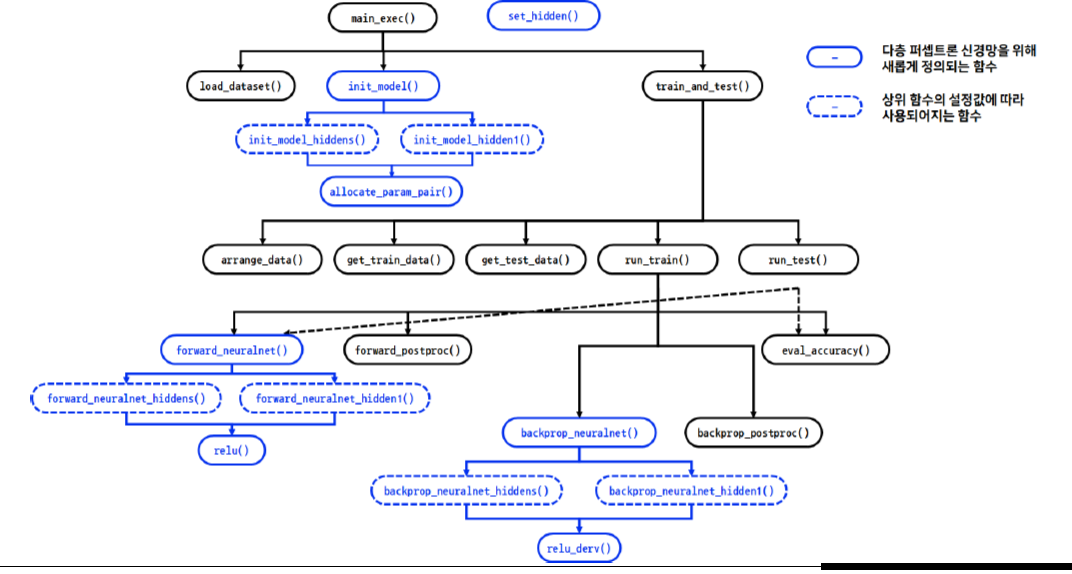

In [17]:
global hidden_config
#set_hidden()에 따른 init_model 구현
#은닉 계층의 설정값에 따라 사용되는 기능들을 정의한 함수 구축과정
def init_model():
  if hidden_config is not None:
    print('은닉 계층 {}개를 갖는 다층 퍼셉트론이 작동되었습니다.'.format(len(hidden_config)))
    init_model_hiddens()
  else:
    print('은닉 계층 하나를 갖는 다층 퍼셉트론이 작동되었습니다.')
    init_model_hidden1()

In [18]:
#다수 layer가 등장했을 때 어떻게 구축하는지
def init_model_hiddens():
  global pm_output, pm_hiddens, input_cnt, output_cnt, hidden_config

  pm_hiddens=[]
  prev_cnt=input_cnt #input_cnt의 크기는 다음 계층의 입력크기

  # 은닉 계층에 대한 퍼셉트론
  for hidden_cnt in hidden_config:
    #은닉계층의 첫번째 값[9,3]이면 9 -> 은닉계층에서 또 다른 은닉계층이 있을 수 있으므로
    #뒤에꺼를 앞으로 받는다.(다시 시작지점이 된다.)
    pm_hiddens.append(alloc_param_pair([prev_cnt,hidden_cnt]))
    prev_cnt=hidden_cnt
  pm_ouput=alloc_param_pair([prev_cnt,output_cnt])

#input_cnt, hidden_cnt, output_cnt를 받아 
#각 크기에 맞는 입력 계층과 은닉 계층 사이, 
#은닉 계층과 출력 계층 사이의 파라미터를 생성
def init_model_hidden1():
  global pm_output, pm_hidden, input_cnt, output_cnt, hidden_cnt

  pm_hidden = alloc_param_pair([input_cnt,hidden_cnt])
  pm_output = alloc_param_pair([hidden_cnt,output_cnt])

In [19]:
def alloc_param_pair(shape):
  weight=np.random.normal(RND_MEAN, RND_STD, shape)
# 편향은 항상 출력 퍼셉트론의 크기와 동일하기에 [-1] 을 넣어 출력 크기에 맞춰 진행
  bias = np.zeros(shape[-1])
  return {'w':weight,'b':bias}

In [20]:
def forward_neuralnet(x):
    if hidden_config is not None:
        return forward_neuralnet_hiddens(x)
    else:
        return forward_neuralnet_hidden1(x)
    
def backprop_neuralnet(G_output, hiddens):
    if hidden_config is not None:
        backprop_neuralnet_hiddens(G_output, hiddens)
    else:
        backprop_neuralnet_hidden1(G_output, hiddens)

In [21]:
#따로 활성화 함수가 들어가지 않는다. -> forward_neuralnet_hiddens함수의 output부분

In [22]:
def relu(x):
  return np.maximum(0,x)
def relu_derv(v):
  return np.sign(v)

In [23]:
#은닉 계층의 수와 폭을 셋팅
def set_hidden(info):
  global hidden_cnt, hidden_config
  #일반적인 하나의 은닉계층 이라면
  if isinstance(info, int):
    hidden_cnt = info
    hidden_config = None
  else:
    #리스트값이라면 그대로 다층 퍼셉트론 수행
    hidden_config = info

In [24]:
def backprop_neuralnet_hiddens(G_output, aux):
    global pm_output, pm_hiddens

    hiddens = aux
    
    g_output_w_out = hiddens[-1].transpose()
    G_w_out = np.matmul(g_output_w_out, G_output)
    G_b_out = np.sum(G_output, axis=0)

    g_output_hidden = pm_output['w'].transpose() 
    G_hidden = np.matmul(G_output, g_output_hidden)

    pm_output['w'] -= LEARNING_RATE * G_w_out
    pm_output['b'] -= LEARNING_RATE * G_b_out
    
    for n in reversed(range(len(pm_hiddens))):
        G_hidden = G_hidden * relu_derv(hiddens[n+1])

        g_hidden_w_hid = hiddens[n].transpose()
        G_w_hid = np.matmul(g_hidden_w_hid, G_hidden)
        G_b_hid = np.sum(G_hidden, axis=0)
    
        g_hidden_hidden = pm_hiddens[n]['w'].transpose()
        G_hidden = np.matmul(G_hidden, g_hidden_hidden)

        pm_hiddens[n]['w'] -= LEARNING_RATE * G_w_hid
        pm_hiddens[n]['b'] -= LEARNING_RATE * G_b_hid

In [25]:
def forward_neuralnet_hiddens(x):
    global pm_output, pm_hiddens
    
    hidden = x #독립변수들을 받아 초기화
    hiddens = [x]
    
    for pm_hidden in pm_hiddens: 
      #은닉계층 정보들(pm_hiddens)을 받아 pm_hidden으로 넘겨줍니다.
      #은닉계층이 n개 존재
      hidden = relu(np.matmul(hidden, pm_hidden['w'])+pm_hidden['b']) #각 입력값에 대한 신경망 연산수행 후
      #결괏값을 hidden으로 갱신
      hiddens.append(hidden) #n번 갱신된 값은 n+1번째의 pm_hidden으로 다시 신경망 연산
      
    #출력계층 정보를 받아 출력계층 신경망 연산 후 최종 갱신된 hidden을 활용하여 pm_output으로 다시 연산
    #활성화 함수는 사용되지 않는다.
    output = np.matmul(hidden, pm_output['w']) + pm_output['b']
    return output, hiddens

In [26]:
set_hidden([5,3])
%run /content/abalone.ipynb
main_exec()

Epoch 1 : Train - loss = 33.773, accuracy = 0.556 / Test = 0.811
Epoch 2 : Train - loss = 8.233, accuracy = 0.819 / Test = 0.814
Epoch 3 : Train - loss = 7.573, accuracy = 0.813 / Test = 0.808
Epoch 4 : Train - loss = 7.463, accuracy = 0.810 / Test = 0.807
Epoch 5 : Train - loss = 7.381, accuracy = 0.810 / Test = 0.807
Epoch 6 : Train - loss = 7.313, accuracy = 0.809 / Test = 0.807
Epoch 7 : Train - loss = 7.254, accuracy = 0.809 / Test = 0.808
Epoch 8 : Train - loss = 7.204, accuracy = 0.810 / Test = 0.806
Epoch 9 : Train - loss = 7.160, accuracy = 0.810 / Test = 0.806
Epoch 10 : Train - loss = 7.121, accuracy = 0.809 / Test = 0.806

 최종 테스트 : Final accuracy = 0.806


In [27]:
set_hidden([])
main_exec()

Epoch 1 : Train - loss = 33.618, accuracy = 0.557 / Test = 0.804
Epoch 2 : Train - loss = 8.104, accuracy = 0.820 / Test = 0.809
Epoch 3 : Train - loss = 7.432, accuracy = 0.813 / Test = 0.804
Epoch 4 : Train - loss = 7.324, accuracy = 0.812 / Test = 0.802
Epoch 5 : Train - loss = 7.249, accuracy = 0.810 / Test = 0.803
Epoch 6 : Train - loss = 7.183, accuracy = 0.810 / Test = 0.804
Epoch 7 : Train - loss = 7.127, accuracy = 0.811 / Test = 0.804
Epoch 8 : Train - loss = 7.078, accuracy = 0.810 / Test = 0.805
Epoch 9 : Train - loss = 7.034, accuracy = 0.811 / Test = 0.805
Epoch 10 : Train - loss = 6.995, accuracy = 0.811 / Test = 0.805

 최종 테스트 : Final accuracy = 0.805


In [28]:
set_hidden(4)
main_exec(epoch_count=50, report=10)

Epoch 10 : Train - loss = 7.185, accuracy = 0.806 / Test = 0.818
Epoch 20 : Train - loss = 6.930, accuracy = 0.808 / Test = 0.819
Epoch 30 : Train - loss = 6.795, accuracy = 0.809 / Test = 0.817
Epoch 40 : Train - loss = 6.696, accuracy = 0.810 / Test = 0.819
Epoch 50 : Train - loss = 6.606, accuracy = 0.810 / Test = 0.822

 최종 테스트 : Final accuracy = 0.822
